In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import os

import warnings

In [3]:
warnings.filterwarnings("ignore") # отключает предупреждения

## ДЗ ARIMA

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
# делаем данные
N = 300  #  общее число точек
Nt = 10 #  точек для теста
data = []
for i in range(N):
    v = 2*np.sin(i/3)+3+ np.random.randn()
    data.append(v)
# учим модель
data = np.array(data)

p = d = q = range(0, 1)

In [15]:
import itertools

In [16]:
T = 2*np.pi // (1/3)+1
T

19.0

In [24]:
mod = sm.tsa.SARIMAX(data[:-Nt], order=(0,1,1),
                                            seasonal_order=(0,1,1,T),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit() 
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  290
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 19)   Log Likelihood                -391.626
Date:                            Thu, 05 Nov 2020   AIC                            789.251
Time:                                    18:32:46   BIC                            799.803
Sample:                                         0   HQIC                           793.499
                                            - 290                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8805      0.032    -27.298      0.000      -0.944      -0.817
ma.S.L19      -0.7999      0.062   

## Холт-Винтерс

https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
https://machinelearningmastery.com/how-to-grid-search-triple-exponential-smoothing-for-time-series-forecasting-in-python/
https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing


Тренд + уровень

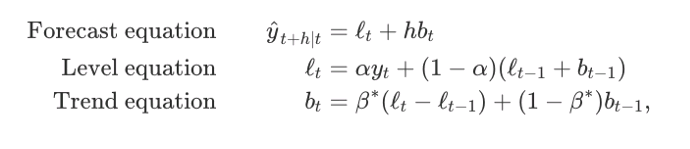

In [81]:
from IPython.display import Image
Image(filename = 'Холт-Винтерс.png') 

(Тренд + Уровень) * Сезон

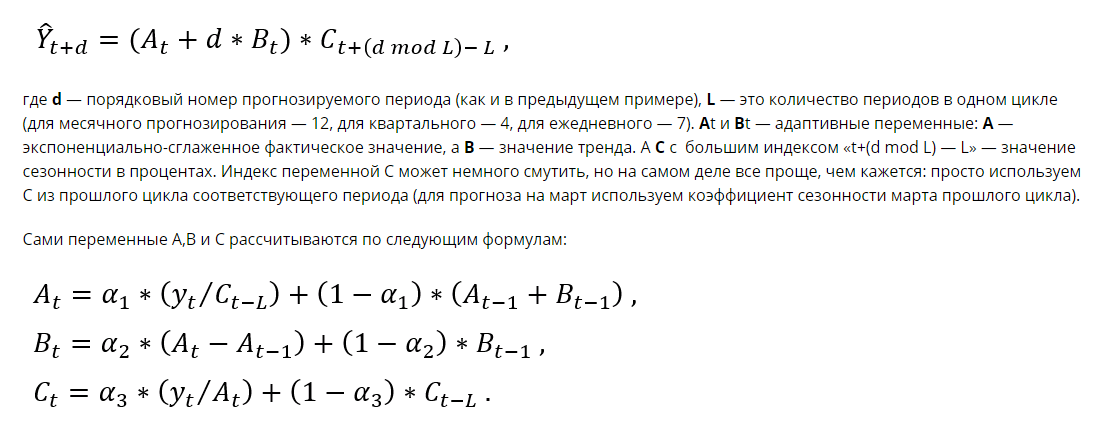

In [85]:
from IPython.display import Image
Image(filename = 'Холт-Винтерс2.png') 

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Пример:

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  540
Model:             ExponentialSmoothing   SSE                             88.194
Optimized:                         True   AIC                           -932.496
Trend:                         Additive   BIC                           -833.790
Seasonal:                      Additive   AICC                          -929.967
Seasonal Periods:                    19   Date:                 Thu, 05 Nov 2020
Box-Cox:                           True   Time:                         20:27:14
Box-Cox Coeff.:                 0.89290                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3987774                alpha                 True
smoothing_slope          

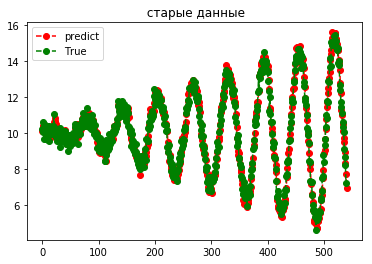

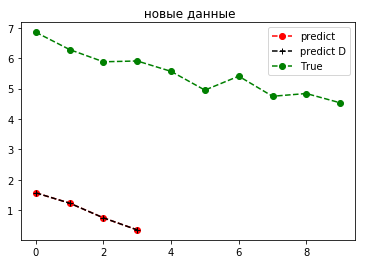

In [91]:
# делаем данные
N = 550  #  общее число точек
Nt = 10 #  точек для теста
data = []
for i in range(N):
    v = i/100*np.sin(i/10) + 10 + np.random.randn()*0.3
    data.append(v)
# учим модель
data = np.array(data) 


# создали модель
model = ExponentialSmoothing(data[:-Nt], dates = pd.date_range('2020-01-01',periods = data.shape[0], freq ='D' ),  trend='Add', seasonal = 'Add', seasonal_periods = T)
# учим модель
model_fit = model.fit(use_boxcox=True)# 
print(model_fit.summary())
# предикт модели
y_pred = model_fit.predict(0, len(data)-Nt)
plt.plot(y_pred, '--or', label='predict')
plt.plot(data[:-Nt] , '--og', label='True')
plt.title(' старые данные')
plt.legend()
plt.show()

pp = Nt
y_fore = model_fit.forecast(steps=pp)
y_d = model_fit.fittedvalues
plt.plot(y_fore, '--or', label='predict')
plt.plot(y_fore, '--+k', label='predict D')
plt.plot(data[-Nt:] , '--og', label='True')
plt.title(' новые данные')
plt.legend()
plt.show()

Стационарный ряд отличается постоянством средних значений и их дисперсий. В нестационарном ряде максимум, что можно сделать - отследить его тренд.

Нестационарные временные ряды - это почти все ценовые графики финансовых активов, столь широко знакомые любому трейдеру. Бычий тренд, медвежий тренд, экстремумы. Исключение составляет боковой дрейф курса на каком-то периоде. 

В особый класс нестационарных рядов выделяют интегрированные, они же разностно-стационарные или DS-ряды (англ. Difference Stationary). 